In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm 

import seaborn as sns

# Normal (Gaussian) Distribution

$$P(X) = \frac{1}{\sigma \sqrt{2 \pi}} \exp{\left[-\frac{1}{2}\left(\frac{X-\mu}{\sigma} \right)^2 \right]}$$

* $\mu$:  mean
* $\sigma$:  standard deviation

In [2]:
def gaussian(x, mu, sigma):
  return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*pow((x-mu)/sigma,2))

<AxesSubplot:xlabel='x', ylabel='y'>

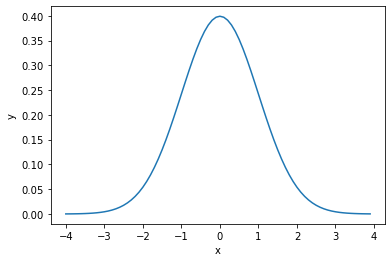

In [45]:
x = np.arange(-4,4,0.1)
y = gaussian(x, 0.0, 1.0)

#plt.plot(x, y)
#plot x vs y with seaborn:
table = pd.DataFrame({'x':x, 'y':y})
sns.lineplot( data = table, x = 'x', y = 'y')

## with scipy

<AxesSubplot:xlabel='x', ylabel='y'>

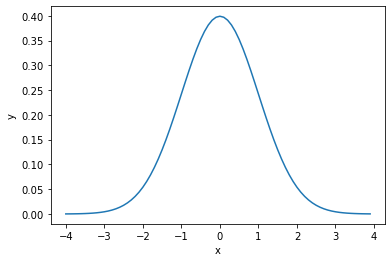

In [48]:
# with scipy
dist = norm(0, 1) #scipy.norm
x = np.arange(-4,4,0.1)
y = [dist.pdf(value) for value in x]
#plt.plot(x, y)
table = pd.DataFrame({'x':x, 'y':y})
sns.lineplot( data = table, x = 'x', y = 'y')

<AxesSubplot:xlabel='x', ylabel='y'>

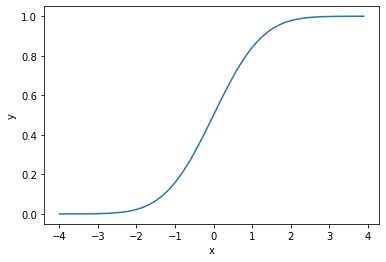

In [5]:
# Cumulative distribution function
dist = norm(0, 1)
x = np.arange(-4,4,0.1)
y = [dist.cdf(value) for value in x]
table = pd.DataFrame({'x':x, 'y':y})
sns.lineplot( data = table, x = 'x', y = 'y')

# Gaussian distribution on dataset

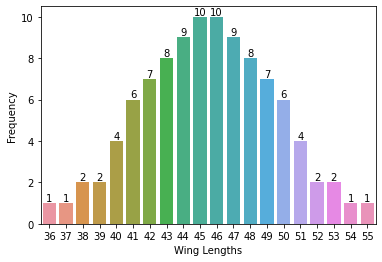

In [6]:
from matplotlib.axis import YAxis


df = pd.read_excel('s057.xls')
arr = df['Normally Distributed Housefly Wing Lengths'].values[3:]
values, freqs = np.unique(arr, return_counts = True)
dfVals = pd.DataFrame({'values':values, 'freqs':freqs})

barplot = sns.barplot(data = dfVals, x = 'values', y = 'freqs')
barplot.set(xlabel = 'Wing Lengths', ylabel = 'Frequency')

#manipulation of plt components
for b in barplot.containers:
    barplot.bar_label(b, label_type='edge')


# Estimation of Probability Distribution

In [49]:
type(arr)

numpy.ndarray

<BarContainer object of 20 artists>

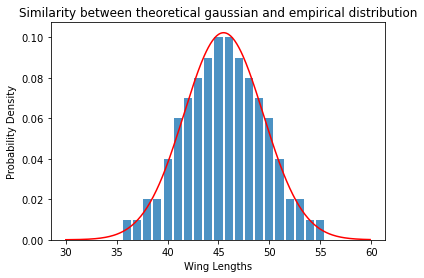

In [62]:
# estimation of probability distribution
mu = arr.mean()

#theoretical distribution
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
plt.plot(x, y, color = 'red')
#axis labels
plt.xlabel('Wing Lengths')
plt.ylabel('Probability Density')
plt.title('Similarity between theoretical gaussian and empirical distribution')

# data
values, dist = np.unique(arr, return_counts=True)
plt.bar(values, dist/len(arr), alpha = 0.8)

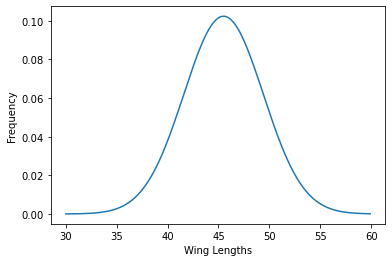

[Text(0.5, 0, 'Wing Lengths'), Text(0, 0.5, 'Frequency')]

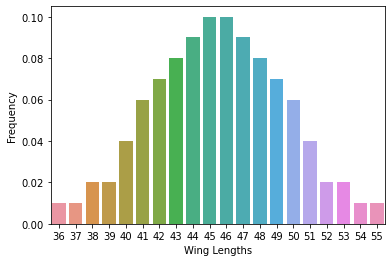

In [60]:
mu = arr.mean()

#Theoretical distribution
sigma = arr.std()
dist = norm(mu, sigma)
x = np.arange(30,60,0.1)
y = [dist.pdf(value) for value in x]
theoretDf = pd.DataFrame({'x':x, 'y':y})


linePl = sns.lineplot(data = theoretDf, x = 'x', y = 'y',)
linePl.set(xlabel = 'Wing Lengths', ylabel = 'Frequency')
plt.show()


values, freq = np.unique(arr, return_counts=True)
dataDf = pd.DataFrame({'values':values, 'freq':freq/len(arr)})
barPl = sns.barplot(data = dataDf, x = 'values', y = 'freq')
barPl.set(xlabel = 'Wing Lengths', ylabel = 'Frequency')